<a href="https://colab.research.google.com/github/ishaq27/MFF/blob/master/Fashion_MINST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fashion MNIST DataSet
#***By Muhammad Ishaq - PIAIC61884***

# Using CNN

Model creation using simple neural networks

In [ ]:
pip install -U tensorflow_datasets

     |████████████████████████████████| 3.7MB 7.7MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
from __future__ import absolute_import, division, print_function

In [ ]:

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# for better progress bar
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
tf.compat.v1.enable_eager_execution()

In [ ]:
dataset, metadata = tfds.load('fashion_mnist',as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print('Number of training examples:{}'.format(num_train_examples))
print('Number of test examples:{}'.format(num_test_examples))

Number of training examples:60000
Number of test examples:10000


# data preprocessing started

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map functionapplies the normalize function to each element in the tranin
# and test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()


dataset, metadat = tfds.load('fashion_mnist',as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# Explore the processed data
lets plot an image to see what it looks like


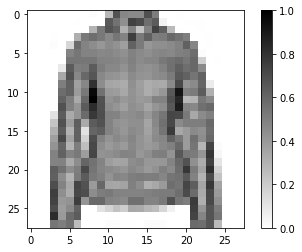

In [ ]:
# Tae a sngle image, and reove the color dimension by eshaping

for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

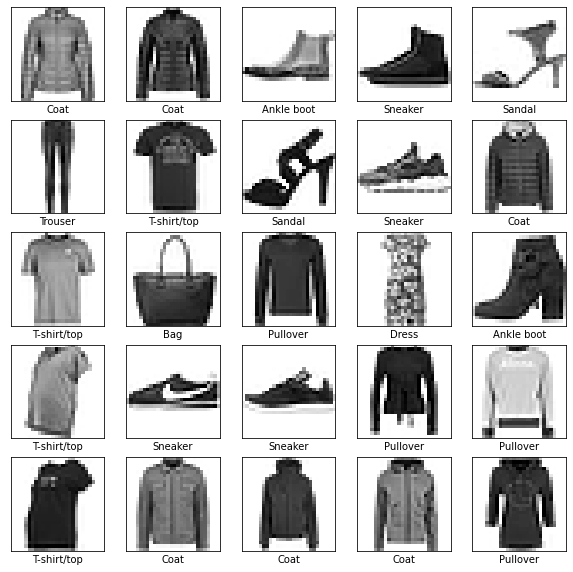

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(test_dataset.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()


# Build the model
Building the nural network requires configuring the layers f the model, then compiling the model.

# Setup the layers
The basic buildng block of neural network is the layer. A layer extracts a representation from the data fed into it. Hopefully, a series of connected layers results in a representation that is meaningful for the problem at hand.

Much of deep leaning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense,have internal parameters which are adjusted("learned") during training.

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), padding='same',activation=tf.nn.relu,
                               input_shape = (28,28,1)),
        tf.keras.layers.MaxPool2D((2,2), strides=2),
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D((2,2), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
num_train_example = metadata.splits['train'].num_examples

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
#num_train_example = 60000
#num_test_example = 10000

#**Train the model**
First, we define the iteration behavior for the train dataset:

1. Repeat forever for specifying dataet.repeat() (the epochs parameter described below limits how long we perform training).
2. The dataset.shuffle(60000) randomizes the order so our model cannot learn anything from the order of the example
3.And dataset.batch(32) tells model.fit to use batches of 32 images and labels when updating the model variables.


Traning is performed by calling the model.fit method:

1. Feed the training data to the model using train_dataset
2. model learns to associate images and labels.
3. The eochs=5 parameter limits training to 5 full iterations of the training dataset, so a total of 5*60000 = 300000 examples.

(Don't worry aboutsteps_per_epoch, the requirement to have this flag will soon be removed


In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_test_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)


In [ ]:
model.fit(train_dataset, epochs=10,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 16s 5ms/step - loss: 0.5564 - accuracy: 0.7989
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2830 - accuracy: 0.8979
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2231 - accuracy: 0.9169
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1868 - accuracy: 0.9310
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1665 - accuracy: 0.9380
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1425 - accuracy: 0.9478
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1155 - accuracy: 0.9571
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1008 - accuracy: 0.9618
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0834 - accuracy: 0.9678
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.07

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2864 - accuracy: 0.9225
Accuracy on test dataset: 0.9225000143051147


#*Accuracy on test dataset:* ***92***%#




# **Make Predictions and explore**|

with the model trained, we can use it to make predictions about some image


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_lables = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([8.1811315e-08, 4.3456080e-10, 3.4071019e-04, 5.0234408e-09,
       9.1276145e-01, 6.1608468e-10, 8.6897679e-02, 2.4163421e-11,
       2.1790324e-10, 8.9885397e-08], dtype=float32)

A Prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

<tf.Tensor: shape=(), dtype=int64, numpy=4>

We can grrph this to look at the full set of 10 channels

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


Now looks at the 0th image, predictions and predictions array.

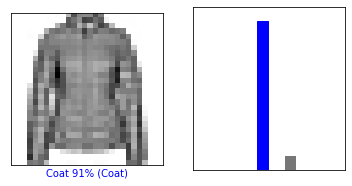

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

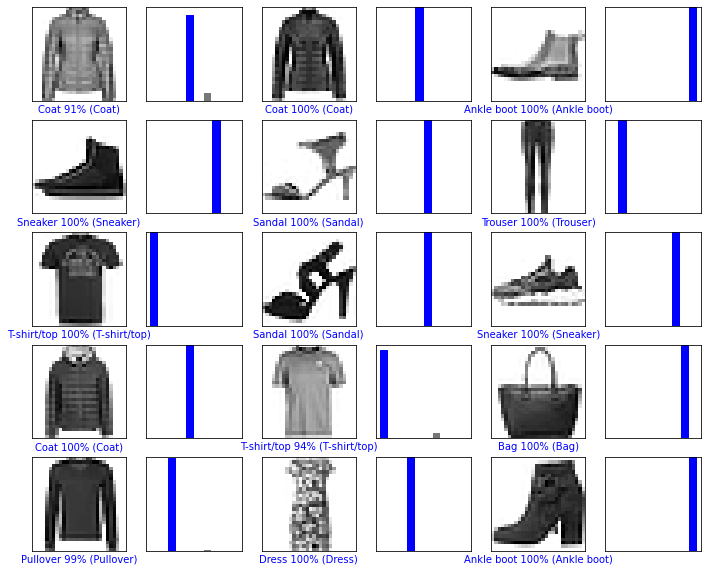

In [ ]:
num_row = 5
num_cols = 3
num_images = num_row * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_row))
                                                   
for i in range(num_images):
  plt.subplot(num_row, 2* num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_row, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)